In [15]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [16]:
df = pd.read_excel("../data/predictions.xlsx")
df = df[["proj_home_xg", "proj_away_xg", "home_xg", "away_xg", "home_goals", "away_goals"]]
df = df.dropna()
df

,proj_home_xg,proj_away_xg,home_xg,away_xg,home_goals,away_goals
0,1.34,1.91,3.53,0.84,2,1
1,1.71,1.33,2.08,0.24,2,0
2,1.52,1.25,2.62,0.46,4,0
3,1.94,0.63,2.00,0.72,3,1
4,2.17,0.86,2.45,0.94,2,1
...,...,...,...,...,...,...
480,0.89,0.67,1.19,1.35,1,0
481,0.83,1.26,0.89,1.10,1,1
482,1.06,1.19,0.40,1.01,0,1
483,0.59,0.77,1.21,0.00,3,1


In [17]:
all_goals = pd.concat([df["home_goals"], df["away_goals"]], ignore_index=True)
all_proj = pd.concat([df["proj_home_xg"], df["proj_away_xg"]], ignore_index=True)
all_xg = pd.concat([df["home_xg"], df["away_xg"]], ignore_index=True)

# Goals vs Proj xG
print("Goals vs Proj xG")
mae1 = mean_absolute_error(all_goals, all_proj)
print(f"MAE: {mae1:.3f}")
rmse1 = np.sqrt(mean_squared_error(all_goals, all_proj))
print(f"RMSE: {rmse1:.3f}")
rscore1 = r2_score(all_goals, all_proj)
print(f"R² Score: {rscore1:.3f}")

# xG vs Proj xG
print("")
print("xG vs Proj xG")
mae2 = mean_absolute_error(all_xg, all_proj)
print(f"MAE: {mae2:.3f}")
rmse2 = np.sqrt(mean_squared_error(all_xg, all_proj))
print(f"RMSE: {rmse2:.3f}")
rscore2 = r2_score(all_xg, all_proj)
print(f"R² Score: {rscore2:.3f}")

# Goals vs xG 
print("")
print("xG vs Goals")
mae3 = mean_absolute_error(all_goals, all_xg)
print(f"MAE: {mae3:.3f}")
rmse3 = np.sqrt(mean_squared_error(all_goals, all_xg))
print(f"RMSE: {rmse3:.3f}")
rscore3 = r2_score(all_goals, all_xg)
print(f"R² Score: {rscore3:.3f}")


Goals vs Proj xG
MAE: 0.847
RMSE: 1.090
R² Score: 0.072

xG vs Proj xG
MAE: 0.598
RMSE: 0.786
R² Score: 0.158

xG vs Goals
MAE: 0.785
RMSE: 1.010
R² Score: 0.203


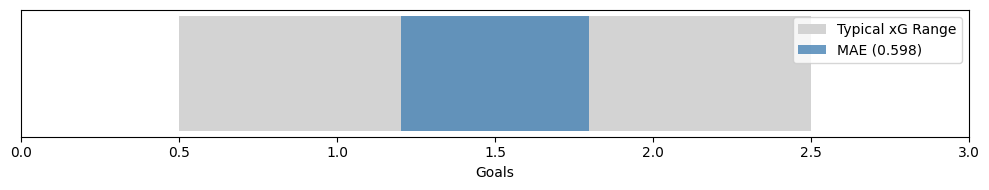

In [18]:
range_center = (0.5 + 2.5) / 2
fig, ax = plt.subplots(figsize=(10, 2))

ax.barh(0, 3, color='white')
ax.barh(0, 2, left=0.5, color='lightgray', label='Typical xG Range')
ax.barh(0, mae2, left=range_center - mae2/2, color='steelblue', alpha=0.8, label=f'MAE ({mae2:.3f})')
ax.set_xlim(0, 3)
ax.set_yticks([])
ax.set_xlabel("Goals")
ax.legend() 

plt.tight_layout()
plt.show()


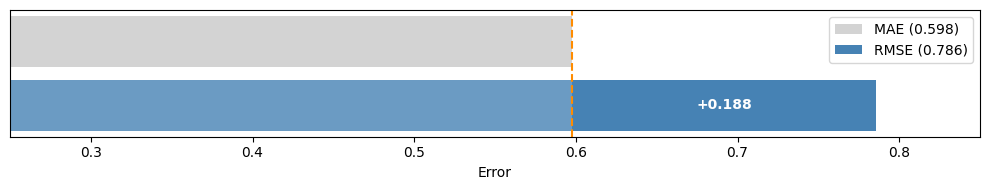

In [19]:
fig, ax = plt.subplots(figsize=(10, 2))

ax.set_xlim(0.25, 0.85)

ax.barh(['RMSE'], [mae2], left=0, color='steelblue', alpha=0.8)
ax.barh(['MAE'], [mae2], color='lightgray', label=f"MAE ({mae2:.3f})")
ax.barh(['RMSE'], [rmse2 - mae2], left=mae2, color='steelblue', label=f"RMSE ({rmse2:.3f})")

ax.axvline(x=mae2, linestyle='--', color='darkorange', linewidth=1.5)

diff = rmse2 - mae2
ax.text(mae2 + diff/2, 0, f'+{diff:.3f}', ha='center', va='center', 
        fontweight='semibold', color='white')

ax.set_xlabel('Error')
ax.set_yticks([])
ax.legend(loc="upper right")

plt.tight_layout()
plt.show()

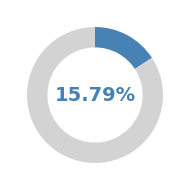

In [20]:
fig, ax = plt.subplots(figsize=(2, 2))

vals = [rscore2*100, 100 - rscore2*100]
ax.pie(vals, radius=1, colors=['steelblue', 'lightgray'],
       wedgeprops=dict(width=0.3), startangle=90, counterclock=False)
ax.text(0, 0, f'{rscore2*100:.2f}%', ha='center', va='center', color="steelblue", fontsize=14, fontweight='semibold')

plt.tight_layout()
plt.show()

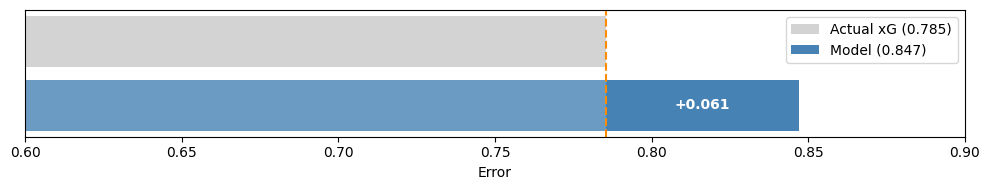

In [21]:
fig, ax = plt.subplots(figsize=(10, 2))

ax.set_xlim(0.6, 0.9)
ax.barh(['Model MAE'], [mae3], left=0, color='steelblue', alpha=0.8)
ax.barh(['Actual xG MAE'], [mae3], color='lightgray', label=f"Actual xG ({mae3:.3f})")
ax.barh(['Model MAE'], [mae1 - mae3], left=mae3, color='steelblue', label=f"Model ({mae1:.3f})")

ax.axvline(x=mae3, linestyle='--', color='darkorange', linewidth=1.5)

diff = mae1 - mae3
ax.text(mae3 + diff/2, 0, f'+{diff:.3f}', ha='center', va='center', 
        fontweight='semibold', color='white')

ax.set_xlabel('Error')
ax.set_yticks([])

ax.legend(loc="upper right")
plt.tight_layout()
plt.show()

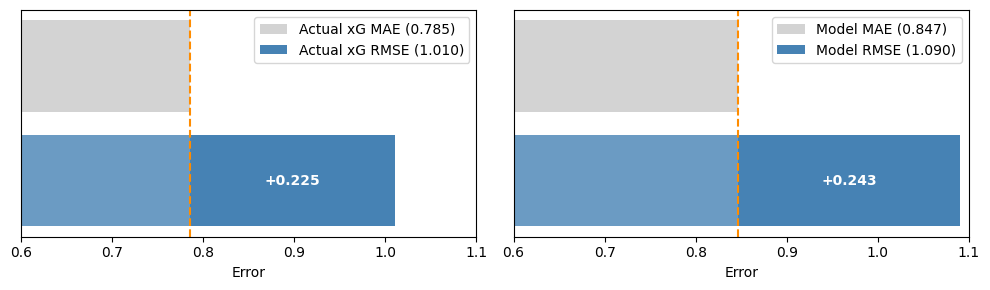

In [29]:
rmse_actual = rmse3
rmse_model = rmse1
mae_actual = mae3
mae_model = mae1

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

# --- Left subplot
ax1.set_xlim(0.6, 1.1)
ax1.barh(['Actual xG RMSE'], [rmse_actual], left=0, color='steelblue', alpha=0.8)
ax1.barh(['Actual xG MAE'], [mae_actual], color='lightgray', label=f"Actual xG MAE ({mae_actual:.3f})")
ax1.barh(['Actual xG RMSE'], [mae_actual - rmse_actual], left=rmse_actual, color='steelblue', label=f"Actual xG RMSE ({rmse_actual:.3f})")
ax1.axvline(x=mae_actual, linestyle='--', color='darkorange', linewidth=1.5)

diff_rmse = rmse_actual - mae_actual
ax1.text(mae_actual + diff_rmse/2, 0, f'+{diff_rmse:.3f}', ha='center', va='center', fontweight='semibold', color='white')
ax1.set_xlabel('Error')
ax1.legend(loc="upper right")

# --- Right subplot
ax2.set_xlim(0.6, 1.1)
ax2.barh(['Model RMSE'], [rmse_model], left=0, color='steelblue', alpha=0.8)
ax2.barh(['Model MAE'], [mae_model], color='lightgray', label=f"Model MAE ({mae_model:.3f})")
ax2.barh(['Model RMSE'], [mae_model - rmse_model], left=rmse_model, color='steelblue', label=f"Model RMSE ({rmse_model:.3f})")
ax2.axvline(x=mae_model, linestyle='--', color='darkorange', linewidth=1.5)

diff_mae = rmse_model - mae_model
ax2.text(mae_model + diff_mae/2, 0, f'+{diff_mae:.3f}', ha='center', va='center', fontweight='semibold', color='white')
ax2.set_xlabel('Error')
ax2.legend(loc="upper right")
ax1.set_yticks([])
ax2.set_yticks([])

plt.tight_layout()
plt.show()

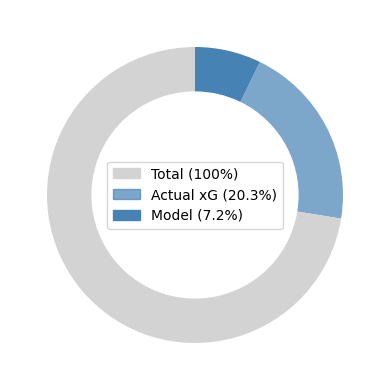

In [35]:
fig, ax = plt.subplots(figsize=(4, 4))

vals = [rscore1*100, rscore3*100, 100 - rscore3*100 - rscore1*100]
wedges, _ = ax.pie(
    vals,
    radius=1,
    colors=['steelblue', 'steelblue', 'lightgray'],
    wedgeprops=dict(width=0.3),
    startangle=90,
    counterclock=False
)

wedges[0].set_alpha(1)
wedges[1].set_alpha(0.7)
wedges[2].set_alpha(1)

lg_patch = mpatches.Patch(color='lightgray', label=f'Total (100%)')
gray_patch = mpatches.Patch(color='steelblue', alpha=0.7, label=f'Actual xG ({rscore3*100:.1f}%)')
black_patch = mpatches.Patch(color='steelblue', label=f'Model ({rscore1*100:.1f}%)')
plt.legend(handles=[lg_patch, gray_patch, black_patch], loc='center')

plt.tight_layout()
plt.show()